In [1]:
data(Boston,package="MASS")

In [24]:
install.packages('rpart')
install.packages('usdm')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
also installing the dependency ‘raster’

Warning message in install.packages("usdm"):
“installation of package ‘raster’ had non-zero exit status”Warning message in install.packages("usdm"):
“installation of package ‘usdm’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [23]:
library(moments)
library(dplyr, warn.conflicts = FALSE)
library(ggplot2)
library(repr)
library(reshape2)
library(caret)
library(rpart)
library(usdm)

ERROR: Error in library(usdm): there is no package called ‘usdm’


In [6]:
str(Boston)

'data.frame':	506 obs. of  14 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ chas   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...
 $ medv   : num  24 21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 ...


In [8]:
Boston$medv <- NULL
Boston$chas <- NULL

In [9]:
str(Boston)

'data.frame':	506 obs. of  12 variables:
 $ crim   : num  0.00632 0.02731 0.02729 0.03237 0.06905 ...
 $ zn     : num  18 0 0 0 0 0 12.5 12.5 12.5 12.5 ...
 $ indus  : num  2.31 7.07 7.07 2.18 2.18 2.18 7.87 7.87 7.87 7.87 ...
 $ nox    : num  0.538 0.469 0.469 0.458 0.458 0.458 0.524 0.524 0.524 0.524 ...
 $ rm     : num  6.58 6.42 7.18 7 7.15 ...
 $ age    : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ dis    : num  4.09 4.97 4.97 6.06 6.06 ...
 $ rad    : int  1 2 2 3 3 3 5 5 5 5 ...
 $ tax    : num  296 242 242 222 222 222 311 311 311 311 ...
 $ ptratio: num  15.3 17.8 17.8 18.7 18.7 18.7 15.2 15.2 15.2 15.2 ...
 $ black  : num  397 397 393 395 397 ...
 $ lstat  : num  4.98 9.14 4.03 2.94 5.33 ...


In [10]:
calculate_r_2 <- function(actual, prediction) {
    return (1 - (sum((actual-prediction)^2)/sum((actual-mean(actual))^2)))
}

calculate_r_2_for_feature <- function(data, feature) {
    n <- nrow(data)
    
    train_index <- sample(seq_len(n), size = 0.8*n)

    train <- data[train_index,]
    test <- data[-train_index,]
    
    this_formula = paste(feature,"~.")
    fit <- rpart(data=train, formula=as.formula(this_formula))

    y_test <- as.vector(test[[feature]])
    test[feature] <- NULL
    predictions <- predict(fit, test)
    return (calculate_r_2(y_test, predictions))
}

mean_r2_for_feature <- function (data, feature) {
    scores = c()
    for (i in 1:100) {
        scores = c(scores, calculate_r_2_for_feature(data, feature))
    }
    
    return (mean(scores))
}

In [17]:
print(paste("crim: ", calculate_r_2_for_feature(Boston,'crim')))
print(paste("zn: ", calculate_r_2_for_feature(Boston,'zn')))
print(paste("indus: ", calculate_r_2_for_feature(Boston,'indus')))
print(paste("nox: ", calculate_r_2_for_feature(Boston,'nox')))
print(paste("rm: ", calculate_r_2_for_feature(Boston,'rm')))
print(paste("age: ", calculate_r_2_for_feature(Boston,'age')))
print(paste("dis: ", calculate_r_2_for_feature(Boston,'dis')))
print(paste("rad: ", calculate_r_2_for_feature(Boston,'rad')))
print(paste("tax: ", calculate_r_2_for_feature(Boston,'tax')))
print(paste("ptratio: ", calculate_r_2_for_feature(Boston,'ptratio')))
print(paste("black: ", calculate_r_2_for_feature(Boston,'black')))
print(paste("lstat: ", calculate_r_2_for_feature(Boston,'lstat')))

[1] "crim:  0.492060476545281"
[1] "zn:  0.827969808330751"
[1] "indus:  0.884623827760367"
[1] "nox:  0.778639837962156"
[1] "rm:  0.340830859922233"
[1] "age:  0.745894158286371"
[1] "dis:  0.826385276503507"
[1] "rad:  0.88838873893256"
[1] "tax:  0.894497182372388"
[1] "ptratio:  0.748717739194848"
[1] "black:  0.296909999346987"
[1] "lstat:  0.528333416613635"


R-squared is a statistical measure of how close the data are to the fitted regression line. It is the percentage of the response variable variation that is explained by a linear model.

In [19]:
cormat <- cor(Boston)
cormat

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat
crim,1.0000000,-0.2004692,0.4065834,0.4209717,-0.2192467,0.3527343,-0.3796701,0.6255051,0.5827643,0.2899456,-0.3850639,0.4556215
zn,-0.2004692,1.0000000,-0.5338282,-0.5166037,0.3119906,-0.5695373,0.6644082,-0.3119478,-0.3145633,-0.3916785,0.1755203,-0.4129946
indus,0.4065834,-0.5338282,1.0000000,0.7636514,-0.3916759,0.6447785,-0.7080270,0.5951293,0.7207602,0.3832476,-0.3569765,0.6037997
nox,0.4209717,-0.5166037,0.7636514,1.0000000,-0.3021882,0.7314701,-0.7692301,0.6114406,0.6680232,0.1889327,-0.3800506,0.5908789
rm,-0.2192467,0.3119906,-0.3916759,-0.3021882,1.0000000,-0.2402649,0.2052462,-0.2098467,-0.2920478,-0.3555015,0.1280686,-0.6138083
age,0.3527343,-0.5695373,0.6447785,0.7314701,-0.2402649,1.0000000,-0.7478805,0.4560225,0.5064556,0.2615150,-0.2735340,0.6023385
dis,-0.3796701,0.6644082,-0.7080270,-0.7692301,0.2052462,-0.7478805,1.0000000,-0.4945879,-0.5344316,-0.2324705,0.2915117,-0.4969958
rad,0.6255051,-0.3119478,0.5951293,0.6114406,-0.2098467,0.4560225,-0.4945879,1.0000000,0.9102282,0.4647412,-0.4444128,0.4886763
tax,0.5827643,-0.3145633,0.7207602,0.6680232,-0.2920478,0.5064556,-0.5344316,0.9102282,1.0000000,0.4608530,-0.4418080,0.5439934
ptratio,0.2899456,-0.3916785,0.3832476,0.1889327,-0.3555015,0.2615150,-0.2324705,0.4647412,0.4608530,1.0000000,-0.1773833,0.3740443


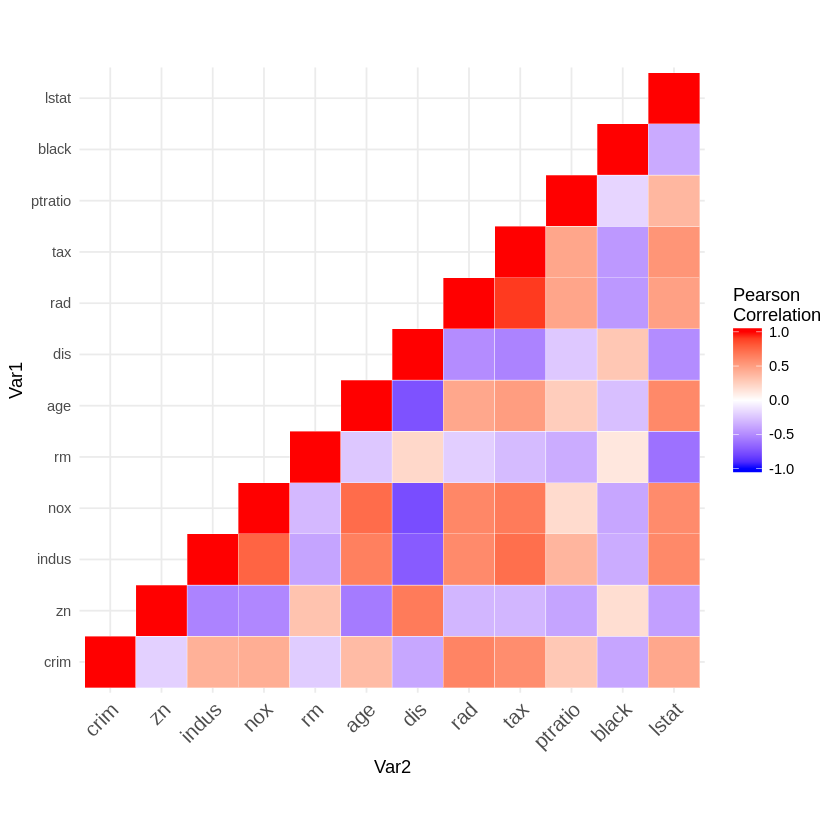

In [20]:
cormat[lower.tri(cormat)] <- NA
melted_cormat <- melt(cormat, na.rm = T)
ggplot(data = melted_cormat, aes(Var2, Var1, fill = value))+
 geom_tile(color = "white")+
 scale_fill_gradient2(low = "blue", high = "red", mid = "white", 
   midpoint = 0, limit = c(-1,1), space = "Lab", 
   name="Pearson\nCorrelation") +
  theme_minimal()+ 
 theme(axis.text.x = element_text(angle = 45, vjust = 1, 
    size = 12, hjust = 1))+
 coord_fixed()

This correlations plot gives a visual representation of how one feature is correlated to another. There seems to be a high correlation between rad and tax. Another is indus and nox which makes sense as more nitric oxid is produced when there is more industrial activities.

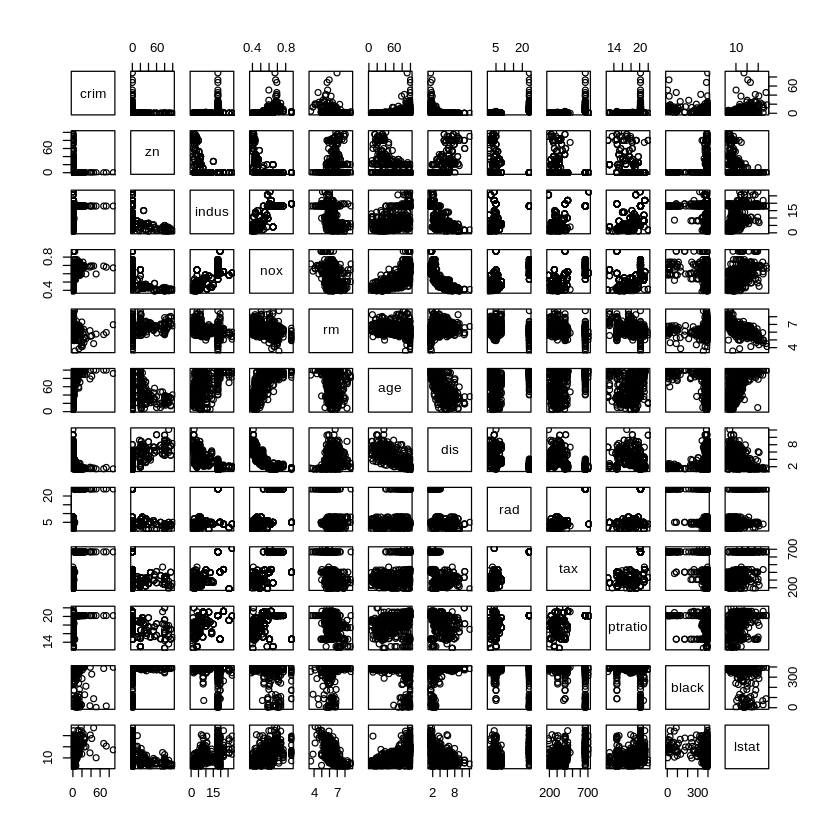

In [21]:
pairs(Boston)

Looking at the pairplot, it seems that it would be easier to look at it with less data points as this pairplot plotted every value and its harder to look for a relationship between two features due to how packed it is. We can see in the example that we pointed out between nox and indus, that there seem to be a positive linear relationship between the two features. nox and dis, age and dis both look to have a negative linear relationship. A positive linear relationship means that points of the plot are pretty tight together and close to having a slope of 1, while a negative linear relationship means the points are close to having a slope of -1.

In [22]:
vif(Boston)

ERROR: Error in eval(expr, envir, enclos): could not find function "vif"


I am unable to show it here as I need the latest R, but by using the variance inflation factor(vif), we are able to look at the numbers to see which features are correlated.